<a href="https://colab.research.google.com/github/ChamupathiDev/SE-4050-DL_LAB_01_IT22098764/blob/main/Task1_it22098764.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [2]:
array_4x4=np.random.exponential(scale=1.0,size=(4,4))
print(array_4x4)

[[0.07797094 0.25863725 2.35032829 0.55964716]
 [0.83756773 0.30480555 2.28981431 0.55910424]
 [0.01366167 1.55328933 0.69164767 0.33872449]
 [0.08862908 0.59712995 0.18110355 0.75437034]]


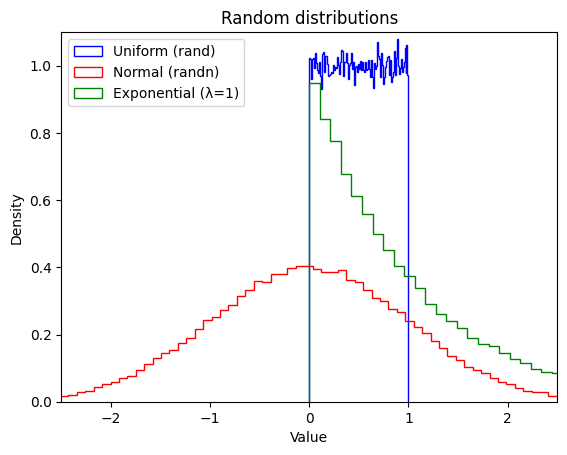

In [3]:
size = 100000
uniform_data = np.random.rand(size)          # Uniform distribution (0, 1)
normal_data = np.random.randn(size)          # Normal distribution (μ=0, σ=1)
exponential_data = np.random.exponential(scale=1.0, size=size)  # Exponential (λ=1)

# Plot histograms
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="Uniform (rand)")
plt.hist(normal_data, density=True, bins=100, histtype="step", color="red", label="Normal (randn)")
plt.hist(exponential_data, density=True, bins=100, histtype="step", color="green", label="Exponential (λ=1)")

# Adjust axis limits to fit all distributions
plt.axis([-2.5, 2.5, 0, 1.1])  # Extended x-axis to show exponential tail
plt.legend(loc="upper left")  # Moved legend to avoid overlap
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

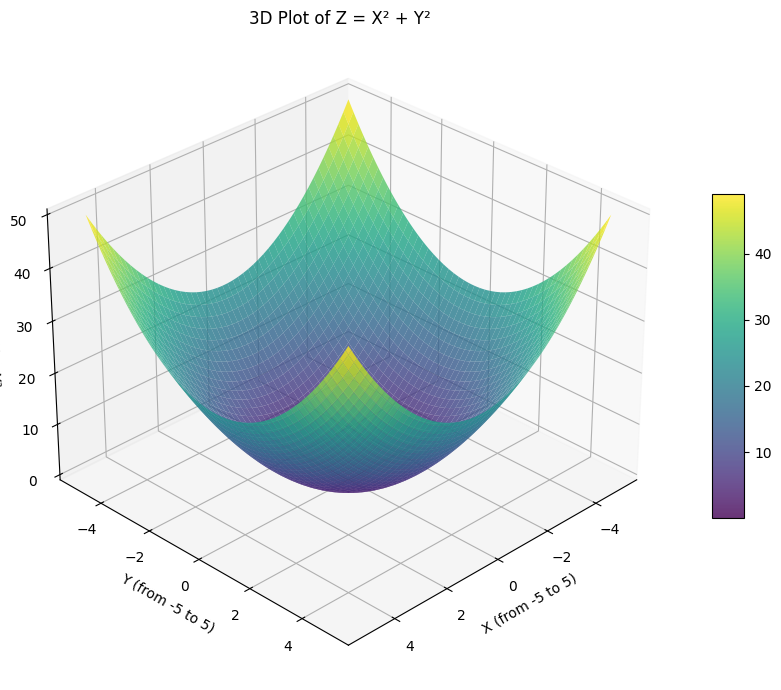

In [4]:
# Create a grid of X and Y values
x = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)  # Combine into a 2D grid

# Compute Z = X² + Y²
Z = X**2 + Y**2

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Enable 3D axes

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Add labels and title
ax.set_xlabel('X (from -5 to 5)')
ax.set_ylabel('Y (from -5 to 5)')
ax.set_zlabel('Z = X² + Y²')
ax.set_title('3D Plot of Z = X² + Y²')

# Add a color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Adjust viewing angle for better perspective
ax.view_init(elev=30, azim=45)  # Elevation and azimuth angles

plt.tight_layout()
plt.show()

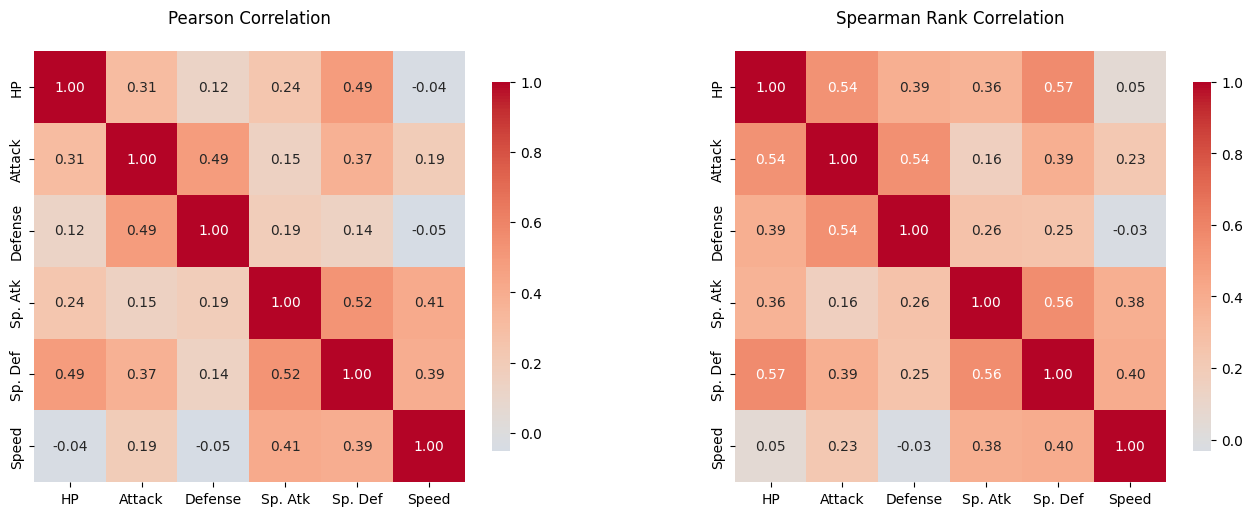


Top 3 Pearson Correlations:
HP       HP         1.000000
Sp. Def  Sp. Atk    0.522907
Attack   Defense    0.491965
Sp. Def  HP         0.490978
dtype: float64

Top 3 Spearman Correlations:
HP       HP         1.000000
         Sp. Def    0.566837
Sp. Atk  Sp. Def    0.561665
Defense  Attack     0.541506
dtype: float64


In [5]:
# Load Pokémon dataset from CSV (alternative source)
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# Select and clean the features of interest
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df_stats = df[features].dropna()

# Calculate correlations
pearson_corr = df_stats.corr(method='pearson')
spearman_corr = df_stats.corr(method='spearman')

# Create subplots
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

# Pearson heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Pearson Correlation', pad=20)

# Spearman heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title('Spearman Rank Correlation', pad=20)

plt.show()

# Print strongest correlations
print("\nTop 3 Pearson Correlations:")
print(pearson_corr.unstack().sort_values(ascending=False).drop_duplicates().head(4))

print("\nTop 3 Spearman Correlations:")
print(spearman_corr.unstack().sort_values(ascending=False).drop_duplicates().head(4))